In [64]:
from gibbs.dataclass import GibbsResult
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector,state_fidelity
import numpy as np
from gibbs.learning.klocal_pauli_basis import KLocalPauliBasis
from gibbs.utils import number_of_elements
from gibbs.preparation.varqite import efficientTwoLocalansatz
from gibbs.learning.hamiltonian_learning import HamiltonianLearning
from scipy.sparse import bmat
from scipy.sparse.linalg import svds, eigsh
from gibbs.utils import simple_purify_hamiltonian,create_heisenberg, create_hamiltonian_lattice,expected_state
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh, svd
from scipy.sparse import bmat
from functools import cache


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SparsePauliOp(['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ', 'XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ'],
              coeffs=[-1.  +0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j,
 -1.  +0.j, -1.  +0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j])
6
0.9084993995195068


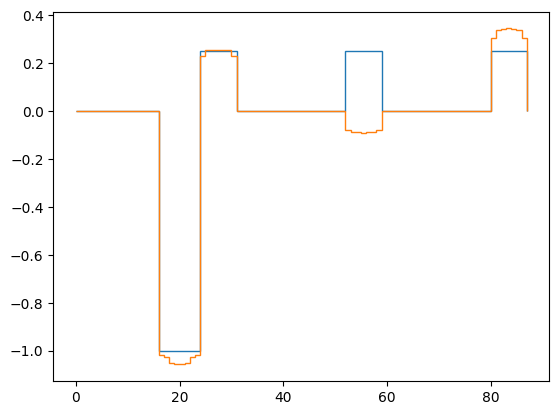

In [89]:
result = GibbsResult.load(
    "saved_simulations/turbo/plots/isingmodel8qubits_controlfield=['0', 'IIIIIIII']_date=27.01.2023_16:52:00.npy"
    )
print(result.hamiltonian)
print(len(result.betas))
hamiltonian = result.hamiltonian
varqite_state = Statevector(result.ansatz.bind_parameters(result.parameters[-1]))
perfect_state = simple_purify_hamiltonian(hamiltonian)
print(state_fidelity(varqite_state,perfect_state))
plt.stairs(result.coriginal)
plt.stairs(result.cfaulties[-1])

In [90]:
def singular_values(state,noise:float):
    hl = HamiltonianLearning(state=state, k_learning=2, k_constraints=3)
    hl.sample_paulis()
    hl.sampled_paulis += np.random.normal(0,noise,hl.sampled_paulis.shape)
    hl.sampled_paulis *= np.random.normal(1,noise,hl.sampled_paulis.shape)
    hl.create_constraint_matrix()
    noiseless_contraint_matrix = hl.constraint_matrix
    u,vals,vecs = svd(noiseless_contraint_matrix.todense())
    return vals

Text(0, 0.5, 'log(s)')

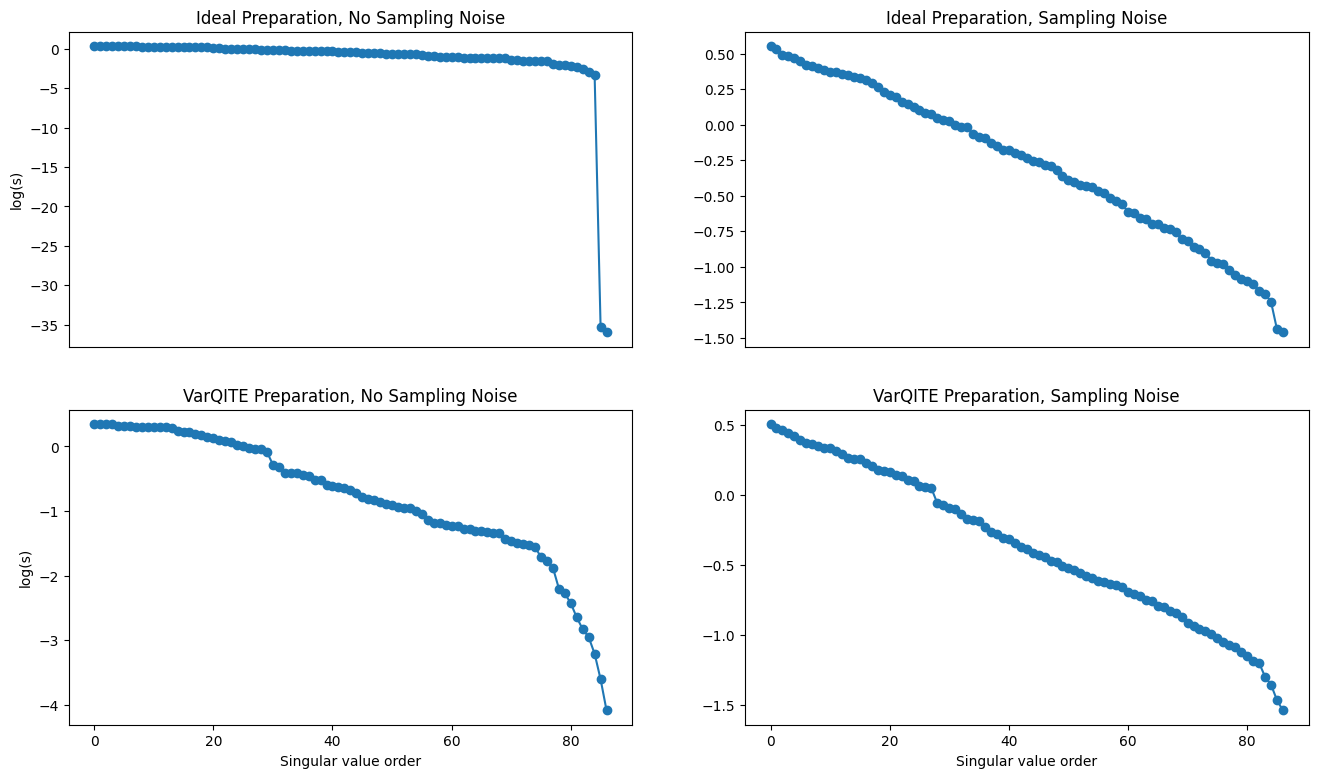

In [91]:
fig,ax = plt.subplots(2,2,figsize=(16,9))

ax[0,0].plot(np.log(singular_values(perfect_state,0)),marker="o")
ax[0,0].set_title("Ideal Preparation, No Sampling Noise")
ax[0,0].set_xticks([])

ax[0,1].plot(np.log(singular_values(perfect_state,5e-2)),marker="o")
ax[0,1].set_title("Ideal Preparation, Sampling Noise")
ax[0,1].set_xticks([])

ax[1,0].plot(np.log(singular_values(varqite_state,0)),marker="o")
ax[1,0].set_title("VarQITE Preparation, No Sampling Noise")

ax[1,1].plot(np.log(singular_values(varqite_state,5e-2)),marker="o")
ax[1,1].set_title("VarQITE Preparation, Sampling Noise")

# fig.suptitle('8 qubit Ising Model - Constraint Matrix Spectral Decomposition')

ax[1,0].set_xlabel("Singular value order")
ax[1,1].set_xlabel("Singular value order")
ax[0,0].set_ylabel("log(s)")
ax[1,0].set_ylabel("log(s)")

SparsePauliOp(['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ', 'XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX', 'YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY', 'ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ'],
              coeffs=[-1.  +0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j, -1.  +0.j,
 -1.  +0.j, -1.  +0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j])
1.0
0.9084993995195068


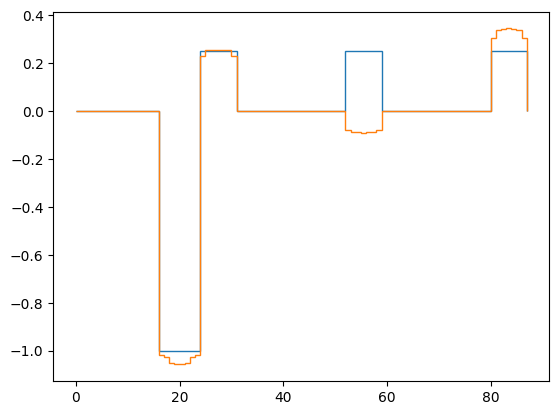

In [88]:
result_cfield = GibbsResult.load(
    "saved_simulations/turbo/plots/isingmodel8qubits_controlfield=['0', 'IIIIIIII']_date=27.01.2023_16:52:00.npy"
    # "saved_simulations/turbo/plots/isingmodel8qubits_controlfield=['0.25', 'IIZIIIII']_date=27.01.2023_13:13:03.npy"
    )
print(result_cfield.hamiltonian)
print(result_cfield.betas[-1])
hamiltonian_cfield = result_cfield.hamiltonian
varqite_state_cfield = Statevector(result_cfield.ansatz.bind_parameters(result_cfield.parameters[-1]))
perfect_state_cfield = simple_purify_hamiltonian(hamiltonian_cfield)
print(state_fidelity(varqite_state_cfield,perfect_state_cfield))
plt.stairs(result_cfield.coriginal)
plt.stairs(result_cfield.cfaulties[-1])
# plt.stairs(result_cfield.cfaulties[-1]-result_cfield.coriginal)
# plt.stairs(result.cfaulties[-1]-result.coriginal)

In [68]:
def constraint_matrix(state,noise):
    hl = HamiltonianLearning(state=state, k_learning=2, k_constraints=3)
    hl.sample_paulis()
    hl.sampled_paulis += np.random.normal(0,noise,hl.sampled_paulis.shape)
    hl.sampled_paulis *= np.random.normal(1,noise,hl.sampled_paulis.shape)
    hl.create_constraint_matrix()
    return hl.constraint_matrix

def singular_values_extended(states: tuple ,noise:float):
    K = [constraint_matrix(state,noise) for state in states]
    A = bmat([[K[0],None],[K[1],K[1]]])
    u,vals,vecs = svd(A.todense())
    return vals

Text(0, 0.5, 'log(s)')

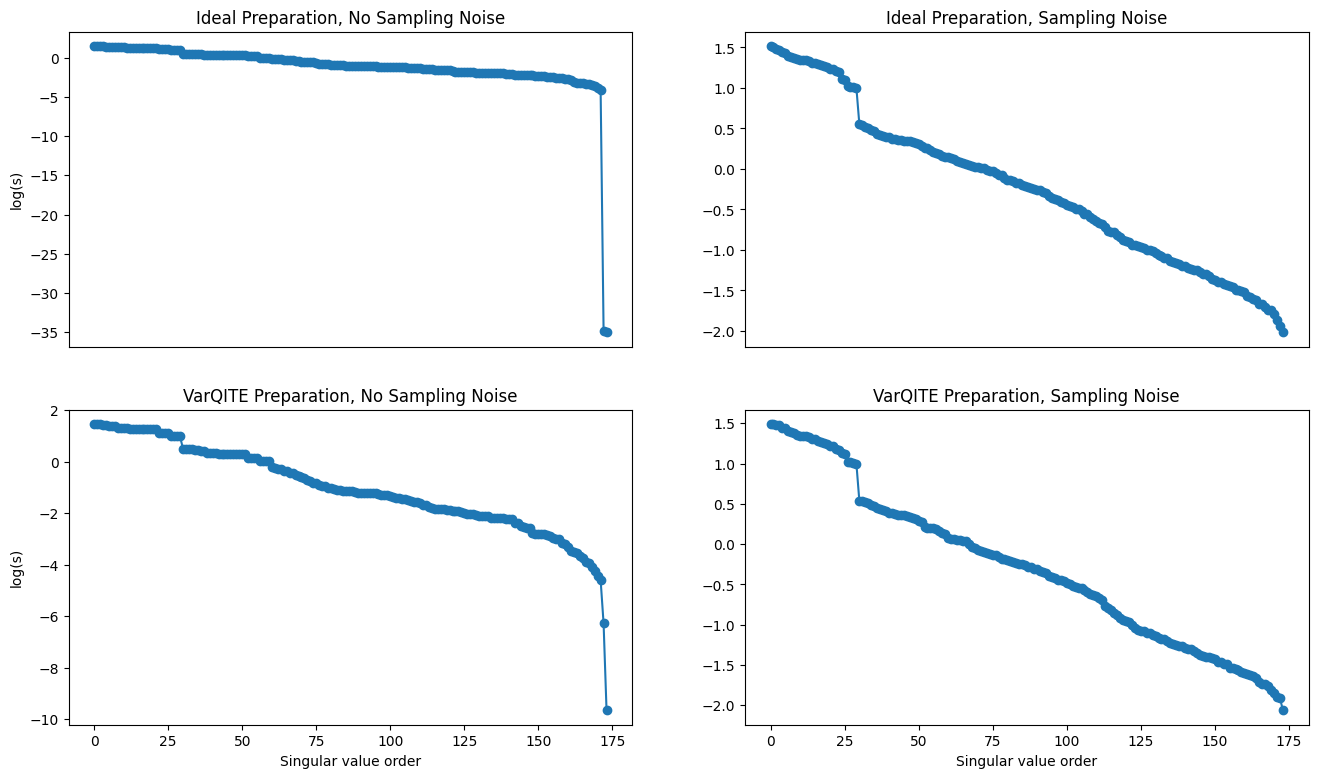

In [70]:
fig,ax = plt.subplots(2,2,figsize=(16,9))

ax[0,0].plot(np.log(singular_values_extended((perfect_state,perfect_state_cfield),0)),marker="o")
ax[0,0].set_title("Ideal Preparation, No Sampling Noise")
ax[0,0].set_xticks([])

ax[0,1].plot(np.log(singular_values_extended((perfect_state,perfect_state_cfield),5e-2)),marker="o")
ax[0,1].set_title("Ideal Preparation, Sampling Noise")
ax[0,1].set_xticks([])

ax[1,0].plot(np.log(singular_values_extended((varqite_state,varqite_state_cfield),0)),marker="o")
ax[1,0].set_title("VarQITE Preparation, No Sampling Noise")

ax[1,1].plot(np.log(singular_values_extended((varqite_state,varqite_state_cfield),5e-2)),marker="o")
ax[1,1].set_title("VarQITE Preparation, Sampling Noise")

# fig.suptitle('8 qubit Ising Model - Control Field Constraint Matrix Spectral Decomposition')

ax[1,0].set_xlabel("Singular value order")
ax[1,1].set_xlabel("Singular value order")
ax[0,0].set_ylabel("log(s)")
ax[1,0].set_ylabel("log(s)")